## Creating a scene with Ball and Plane (show plane, background, camera pose) 

pybullet build time: Jun 12 2023 15:17:43


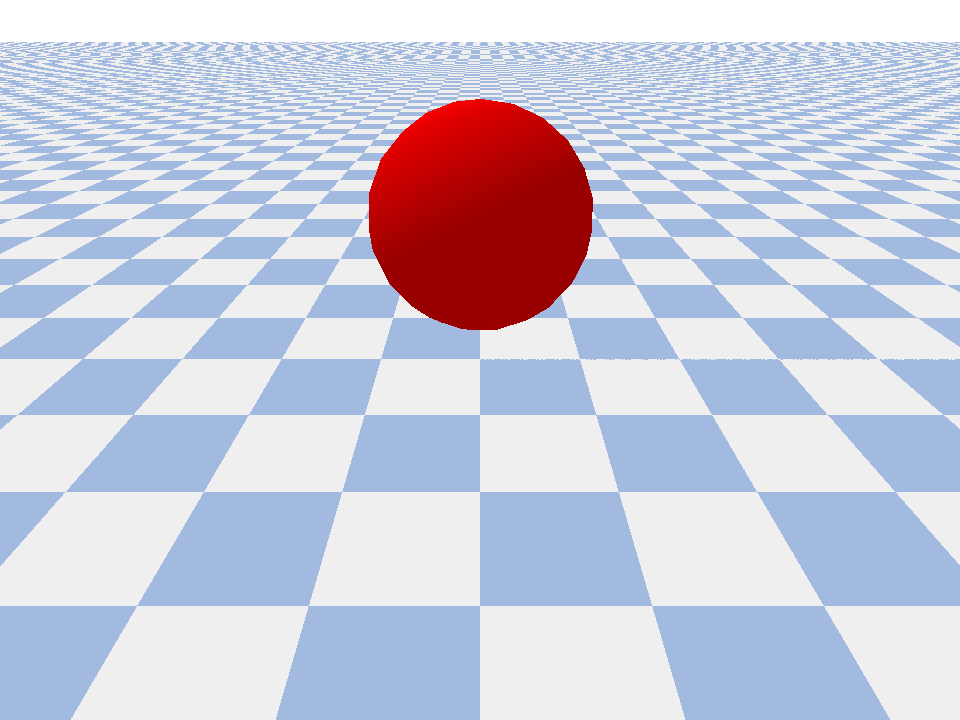

In [1]:
import bayes3d.pybullet_sim as pbs
import numpy as np

# create a scene
scene = pbs.Scene()

# define a position and create a sphere
position = np.array([0, -2, 2])
sphere = pbs.create_sphere(position, [1,1,1]) 

# add the sphere to the scene
scene.add_body(sphere)
image,depth, segm= scene.render(pbs.pybullet_render) 
image



## Creating a scene with custom mesh (custom mesh)

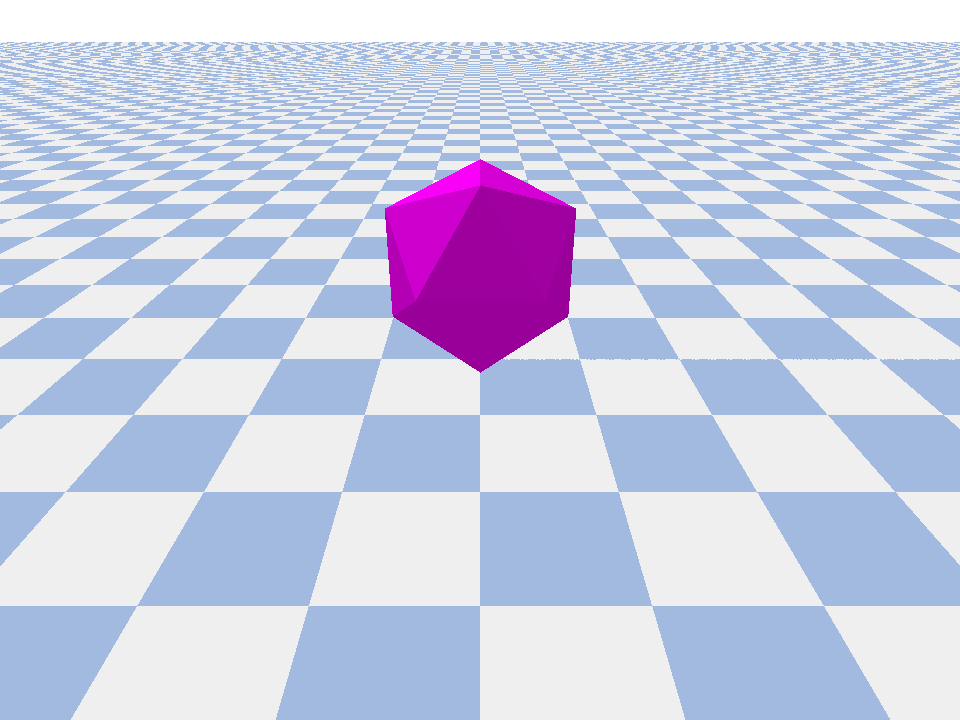

In [2]:
import bayes3d.pybullet_sim as pbs
import numpy as np

path_to_mesh = "../assets/sample_objs/icosahedron.obj"

# create a scene
scene = pbs.Scene()

# define a pose and create a sphere
d20_pose = np.eye(4)
d20_rot = np.array([[0, 0, 1], [0, 1, 0], [-1, 0, 0]])
d20_pos = np.array([0, 0, 1])
d20_pose[:3,:3] = d20_rot
d20_pose[:3,3] = d20_pos

# create a d20
d20 = pbs.make_body_from_obj_pose(path_to_mesh, d20_pose, id = "d20")
d20.set_color([1,0,1])
scene.add_body(d20)
image, depth, segm = scene.render(pbs.pybullet_render)
image

## Render Depth

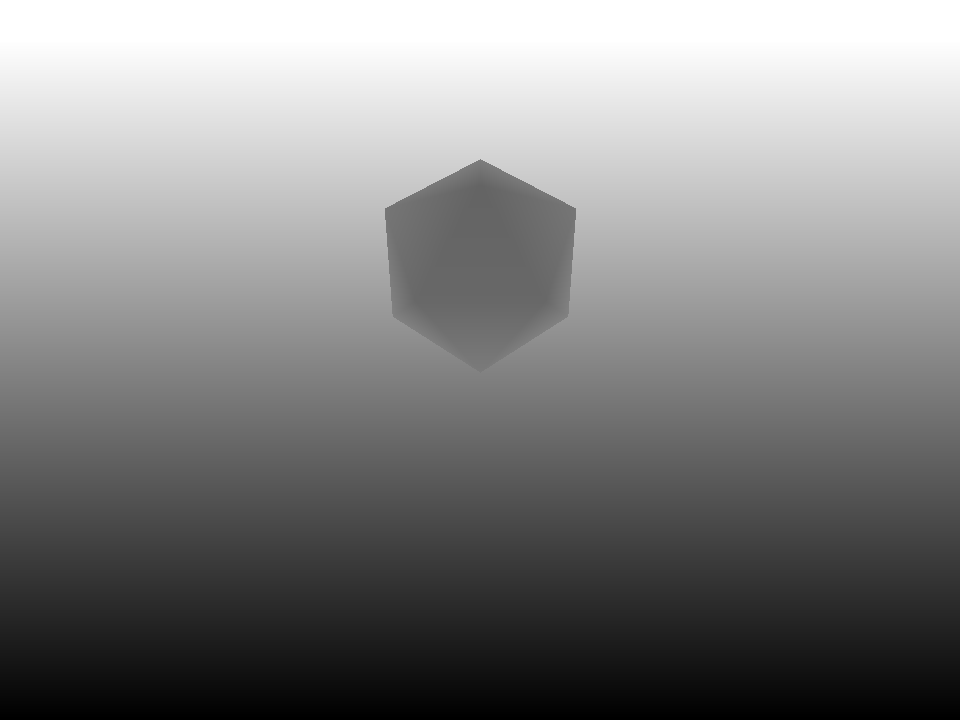

In [3]:
depth

/var/folders/3z/br7bvsdx7jd32ftw3tfm8dw80000gn/T/ipykernel_12521/1586457943.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', num_classes)


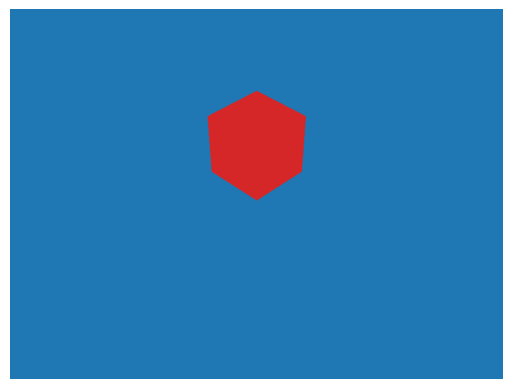

In [6]:
import matplotlib.pyplot as plt

class_array = segm
# Create a colormap for the number of classes
# num_classes = np.max(class_array) + 1
num_classes = 4
cmap = plt.cm.get_cmap('tab10', num_classes)

# Create an RGB image based on the class array and colormap
class_image = cmap(class_array)
class_image = (class_image[:, :, :3] * 255).astype(np.uint8)

# Display the class image
plt.imshow(class_image)
plt.axis('off')
plt.show()

## Adjusting mesh scaling

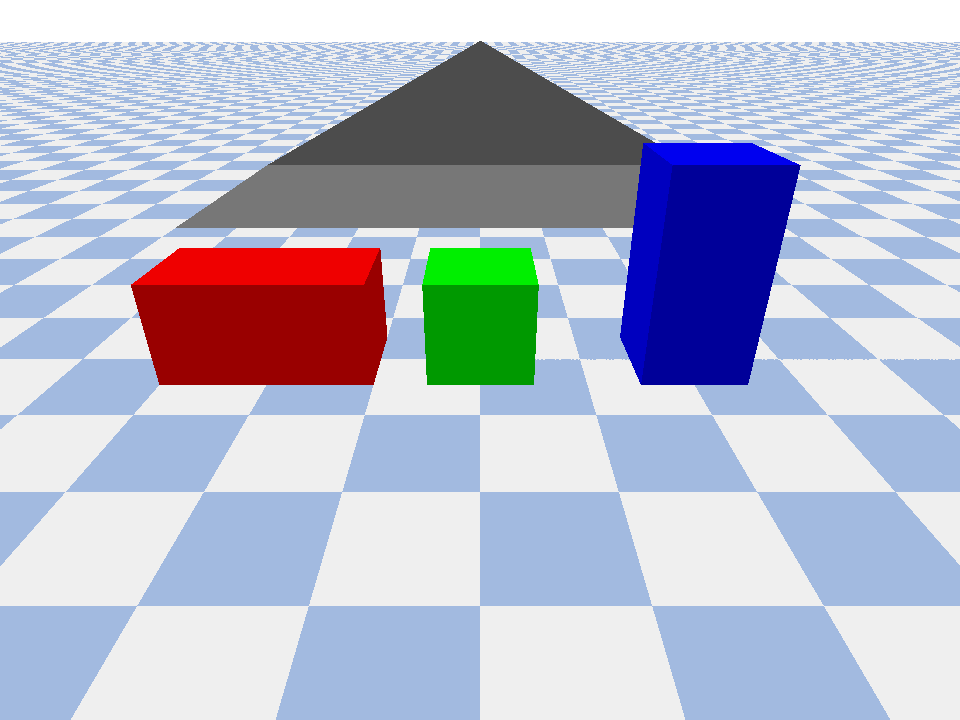

In [18]:
import bayes3d.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

# default cube, length 1 at origin 
original_cube = pbs.create_box(np.array([0,0,0.5]), id="original_cube")
original_cube.set_color([0,1,0])

# wide box, set scale after construction 
second_cube = pbs.create_box(np.array([-2,0,0.5]), id="second_cube")
second_cube.set_color([1,0,0])
second_cube.set_scale(np.array([2,1,1]))

# tall box, can set scale at construction
third_cube = pbs.create_box(np.array([2,0,1]), np.array([1,1,2]), id="third_cube")
third_cube.set_color([0,0,1])

# custom obj, large scale 
diamond = pbs.make_body_from_obj("../assets/sample_objs/pyramid.obj", np.array([0,2,2]), id="diamond")
diamond.set_scale(np.array([6,3,1]))
diamond.set_color([.5,.5,.5])

# add all bodies to scene
scene.add_body(original_cube)
scene.add_body(second_cube)
scene.add_body(third_cube)
scene.add_body(diamond)

# could also have added all at once 
# scene.add_bodies([original_cube, second_cube, third_cube, diamond])

image, depth, segm = scene.render(pbs.pybullet_render)
image


## TODO: Add Textured Objects

In [ ]:
## p.loadTexture(filename) returns an ID 
## p.changeVisualShape(bodyUniqueId, linkIndex, textureUniqueId)

## Adjusting Orientations 

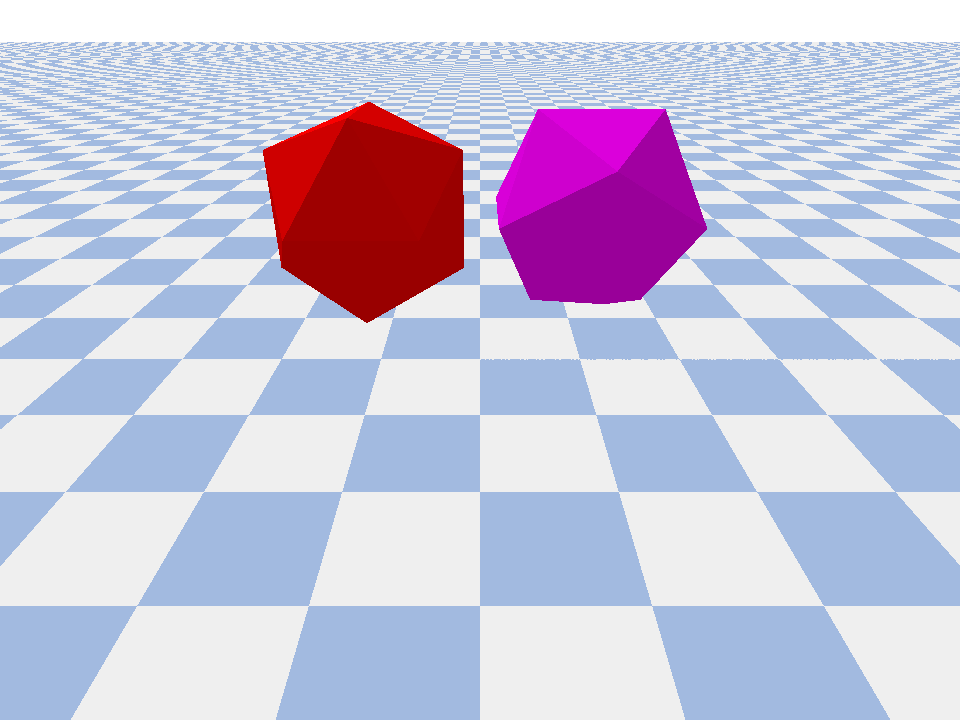

In [10]:
import bayes3d.pybullet_sim as pbs
import numpy as np

path_to_mesh = "../assets/sample_objs/icosahedron.obj"

# create scene and positions 
scene = pbs.Scene()
d20_position = np.array([1, 0, 1.5])   
rotated_position = np.array([-1, 0, 1.5]) 
d20 = pbs.make_body_from_obj(path_to_mesh, d20_position, id = "d20")

# create a rotated d20
rotated = pbs.make_body_from_obj(path_to_mesh, rotated_position, id = "rotated")

# define the rotation matrix 
sample_rotation = np.array([[0, 0, 1], [0, 1, 0], [-1, 0, 0]])
rotated.set_orientation(sample_rotation)

d20.set_color([1,0,1])
scene.add_bodies([d20, rotated])
image, depth, segm = scene.render(pbs.pybullet_render)
image


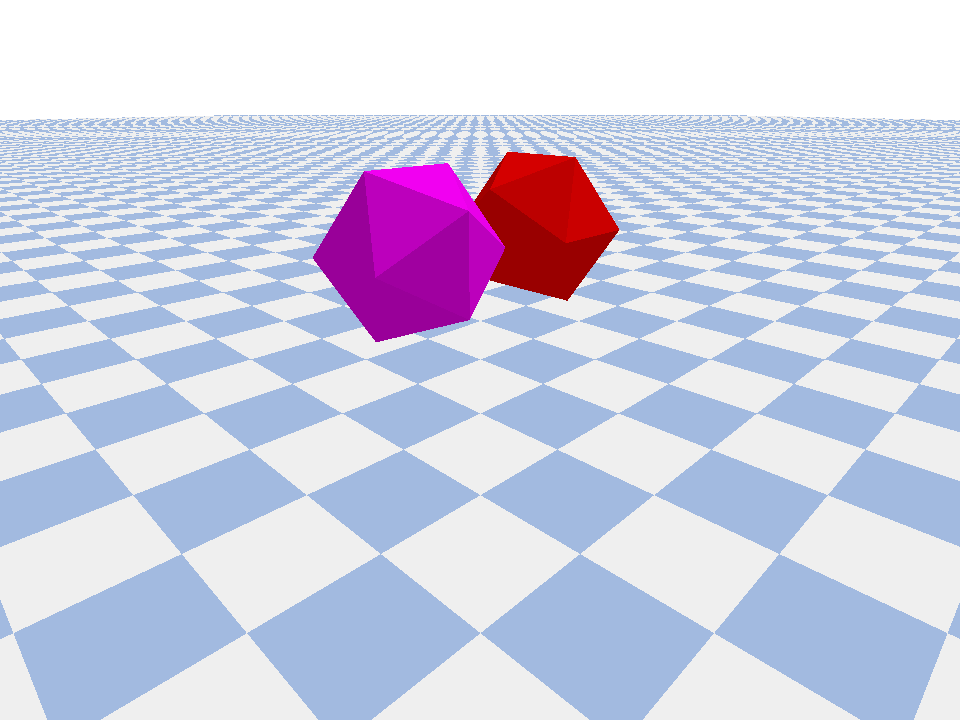

In [11]:
# new camera position
camera_position = np.array([5, 5, 3])
camera_target = np.array([0, 0, 0])
scene.set_camera_position_target(camera_position, camera_target)
image, depth, segm = scene.render(pbs.pybullet_render)
image

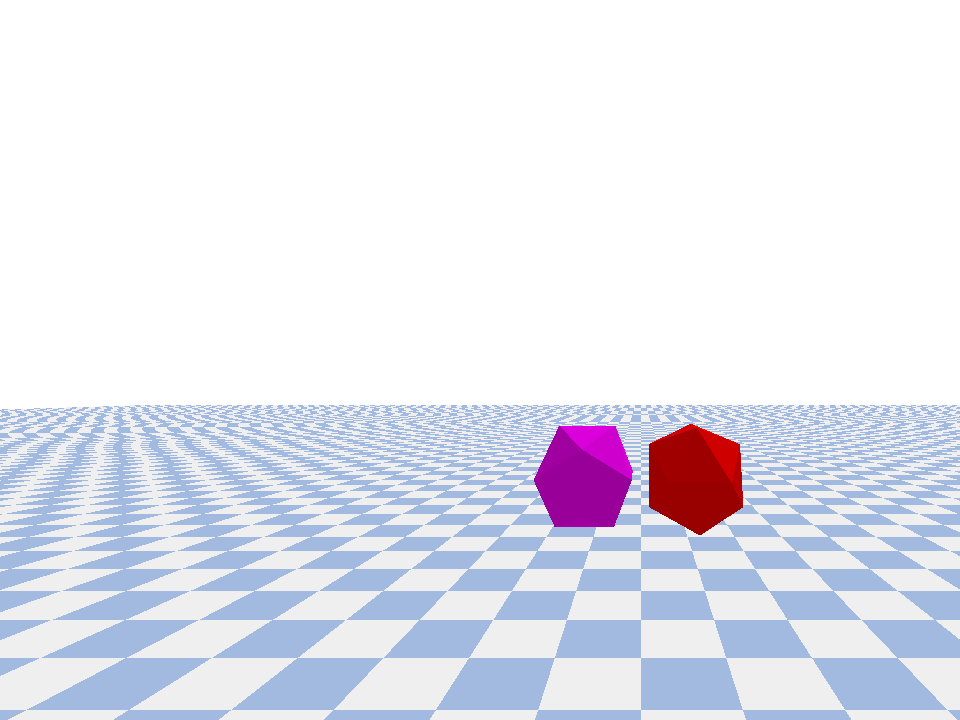

In [12]:
# New Camera Pose 
camera_pose = np.eye(4)

#camera facing downwards 
camera_position = np.array([0, -10, 3])
camera_pose[:3,3] = camera_position
camera_orientation = np.array([[ -1.,0.,0.],
                               [0.,0.28734789,0.95782629],
                               [ 0.,-0.95782629,0.28734789]])
camera_pose[:3,:3] = camera_orientation

scene.set_camera_pose(camera_pose)
image, depth, segm = scene.render(pbs.pybullet_render)
image

## Simple Simulation: Balls colliding (simulation, pybullet class, object poses)

In [1]:
import bayes3d.pybullet_sim as pbs

# define scene and scene gravity, zero gravity by default
scene = pbs.Scene()
scene.set_gravity([0,0,-10])

# create spheres 
sphere_position1 = [-1, 0, 1]
sphere_start_velocity1 = [5, 0, 0]
sphere_position2 = [1, 0, 1]
sphere_start_velocity2 = [-5, 0, 0]
sphere1 = pbs.create_sphere(sphere_position1, 0.5,id = "sphere1")
sphere1.set_velocity(sphere_start_velocity1)
sphere1.set_color([0,1,1])
sphere2 = pbs.create_sphere(sphere_position2, 0.5, "sphere2")
sphere2.set_velocity(sphere_start_velocity2)

# add spheres
scene.add_bodies([sphere1, sphere2])

# simulate for 100 steps, which returns a PyBulletSim object
pyb_sim = scene.simulate(100) 

# create a gif from the simulation
pyb_sim.create_gif("sphere_collision.gif", 50)

pybullet build time: Jun 12 2023 15:17:43


In [ ]:
# use pose information for other visualizers 
pyb_sim.get_body_poses()

In [2]:
pyb_sim.create_seg_gif("sphere_seg.gif", 50)

## Simple Simulation: Balls Bouncing (restitution, gravity) 

In [12]:
import bayes3d.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

#create spheres of varying restitution
sphere1 = pbs.create_sphere(np.array([0, 0, 3]), 0.5, id = "regular_ball")
sphere1.set_color([1,0,0])
sphere1.set_restitution(0.6)
sphere1.set_velocity([0,0,-2])

sphere2 = pbs.create_sphere(np.array([2, 0, 3]), 0.5, id = "bouncy_ball")
sphere2.set_color([0,1,0])
sphere2.set_restitution(1)
sphere2.set_velocity([0,0,-2])

sphere3 = pbs.create_sphere(np.array([-2, 0, 3]), 0.5, id = "flat_ball")
sphere3.set_color([0,0,1])
sphere3.set_restitution(0)
sphere3.set_velocity([0,0,-2])

scene.add_bodies([sphere1, sphere2, sphere3])

# Can set scene gravity 
scene.set_gravity([0,0,-10])

# Can set fps of gif 
pyb_sim = scene.simulate(120)
pyb_sim.create_gif("restitution.gif", 50)

## Simple Simulation: Balls Rolling (friction, damping)

In [1]:
import bayes3d.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene() 
path_to_d20 = "../assets/sample_objs/icosahedron.obj"

# create spheres of varying friction
sphere = pbs.create_sphere(np.array([-4,0,1]), scale = [1,1,1], id = "regular_sphere", friction = 1, velocity = [10,0,0])
d20 = pbs.make_body_from_obj(path_to_d20, np.array([-4,1,1]), id = "d20", friction = 1, velocity = [10,0,0])
d20_fricitonless = pbs.make_body_from_obj(path_to_d20, np.array([-4,2,1]), id = "d20_fricitonless", friction = 0, velocity = [10,0,0])
d20.set_color([1,0,1])
d20.set_scale = np.array([.6,.6,.6])
d20_fricitonless.set_color([0,1,1])
d20_fricitonless.set_scale = np.array([.6,.6,.6])


scene.add_bodies([sphere, d20, d20_fricitonless])
scene.set_gravity([0,0,-10])
scene.set_camera_position_target([0,-10,10], [0,0,0])

pyb_sim = scene.simulate(80)
pyb_sim.create_gif("rolling.gif", 50)

pybullet build time: Jun 12 2023 15:17:43


In [7]:
# can track velocities of each object 
velocities = pyb_sim.get_body_velocities() 
sphere_vel = velocities.get("regular_sphere")
linear = [timestep['velocity'] for timestep in sphere_vel]
linear

[(10.0, 0.0, 0.0),
 (10.132606110246579, -2.2910960021508338, -0.16666666596095267),
 (10.132606110246579, -2.2910960021508338, -0.3333333326276193),
 (10.132606110246579, -2.2910960021508338, -0.499999999294286),
 (10.132606110246579, -2.2910960021508338, -0.6666666659609527),
 (10.132606110246579, -2.2910960021508338, -0.8333333326276193),
 (10.132606110246579, -2.2910960021508338, -0.999999999294286),
 (10.132606110246579, -2.2910960021508338, -1.1666666659609526),
 (10.132606110246579, -2.2910960021508338, -1.3333333326276193),
 (10.132606110246579, -2.2910960021508338, -1.499999999294286),
 (10.132606110246579, -2.2910960021508338, -1.6666666659609528),
 (10.132606110246579, -2.2910960021508338, -1.8333333326276195),
 (10.132606110246579, -2.2910960021508338, -1.9999999992942863),
 (10.132606110246579, -2.2910960021508338, -2.166666665960953),
 (10.132606110246579, -2.2910960021508338, -2.3333333326276193),
 (10.132606110246579, -2.2910960021508338, -2.499999999294286),
 (10.13260

In [5]:
poses = pyb_sim.get_body_poses()
poses

{'regular_sphere': [array([[ 1.,  0.,  0., -4.],
         [ 0.,  1.,  0.,  0.],
         [ 0.,  0.,  1.,  1.],
         [ 0.,  0.,  0.,  1.]]),
  {'velocity': (10.0, 0.0, 0.0), 'angular_velocity': (0.0, 0.0, 0.0)},
  array([[ 9.99984671e-01, -5.53688624e-03, -1.98742278e-11,
          -3.83112323e+00],
         [ 5.53688624e-03,  9.99984671e-01,  3.55770688e-10,
          -3.81849334e-02],
         [ 1.79040613e-11, -3.55875276e-10,  1.00000000e+00,
           9.97222222e-01],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           1.00000000e+00]]),
  {'velocity': (10.132606110246579, -2.2910960021508338, -0.16666666596095267),
   'angular_velocity': (-2.134948801727456e-08,
    -1.1333544650715037e-09,
    0.33221487189888216)},
  array([[ 9.99938740e-01, -1.10686855e-02, -4.16977387e-11,
          -3.66224646e+00],
         [ 1.10686855e-02,  9.99938740e-01,  7.11110063e-10,
          -7.63698667e-02],
         [ 3.38241307e-11, -7.11528040e-10,  1.00000000e+00,
    

In [11]:
pyb_sim.create_depth_gif("rolling_depth.gif", 50)

## Simulations: Angular Velocity 

In [10]:
import bayes3d.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

# d20 with angular velocity
path_to_d20 = "../assets/sample_objs/icosahedron.obj"
d20 = pbs.make_body_from_obj(path_to_d20, np.array([0,0,2]), id = "d20", friction = 1, velocity = [0,0,0], angular_velocity = [0,50,0])
d20.set_color([1,0,1])
d20.set_scale = np.array([.5,.5,.5])

# sphere with angular velocity
sphere = pbs.create_sphere(np.array([2,2,2]), scale = [1,1,1], id = "regular_sphere", friction = 1, velocity = [0,0,0])
sphere.set_angular_velocity([50,50,0])   

# low gravity
scene.add_bodies([sphere, d20])
scene.set_gravity([0,0,-5])
scene.set_downsampling(2)

pyb_sim = scene.simulate(60)
pyb_sim.create_gif("ang_vel.gif", 50)

## Downsampling, Timestep, and Sampling Frequency

In [8]:
import bayes3d.pybullet_sim as pbs
import numpy as np

# bouncing ball 
scene = pbs.Scene() 
ball = pbs.create_sphere(np.array([-3,-3,0]), scale = [1,1,1], id = "ball", friction = 0.1, velocity = [20,35,0])
scene.set_camera_position_target([0,-10,10], [0,0,0])

# boundaries 
wall1 = pbs.create_box(np.array([3,7,1]), scale = [10,.5,3], id = "wall1", friction = 0.1, velocity = [0,0,0])
wall1.set_mass(0)
wall1.set_color([1,1,0])

wall2 = pbs.create_box(np.array([8,2,1]), scale = [.5,10,3], id="wall2", friction = 0.1, velocity = [0,0,0])
wall2.set_mass(0)
wall2.set_color([1,1,0])

wall3 = pbs.create_box(np.array([3,-3,1]), scale = [10,0.5,3], id="wall3", friction = 0.1, velocity = [0,0,0])
wall3.set_mass(0)
wall3.set_color([1,1,0])

scene.add_bodies([ball, wall1, wall2, wall3])
scene.set_gravity([0,0,-10])

# set pybullet to only record pose every 3rd timestep, useful for quickly rendering long simulations
scene.set_downsampling(3) 

pyb_sim = scene.simulate(200)
pyb_sim.create_gif("minigolf.gif", 30)

In [9]:
# compare to no downsampling
scene.set_downsampling(1)
scene.set_timestep(1/60)
pyb_sim = scene.simulate(200)
pyb_sim.create_gif("minigolf_full.gif", 30)

In [19]:
# can also adjust timestep of simulation. default is 1/60 or 60hz
scene.set_downsampling(1)
scene.set_timestep(1/120)
pyb_sim = scene.simulate(200)
pyb_sim.create_gif("minigolf_fine.gif", 30)

## Custom Forces: force, velocity at timestep

In [1]:
import bayes3d.pybullet_sim as pbs
import numpy as np

# scale of spheres
scale = [2,2,2]

# add spheres with random forces applied 
scene = pbs.Scene()
ball = pbs.create_sphere(np.array([-3,0,1]), scale = scale, id = "ball", friction = 0.1, velocity = [10,0,0])
ball.add_force([-1000,-1000,250], 10)
ball.add_force([1000,1000,-250], 40)
ball.add_force([-1000,-1000,-500], 70)
scene.add_body(ball)

ball_1 = pbs.create_sphere(np.array([10,10,1]), scale = scale, id = "ball_1", friction = 0.1, velocity = [-10,0,0])
ball_1.add_force([1000,1000,250], 20)
ball_1.add_force([-1000,-1000,-250], 50)
ball_1.add_force([1000,1000,-500], 70)
ball_1.set_color([1,1,0])
scene.add_body(ball_1)

ball_2 = pbs.create_sphere(np.array([0,3,1]), scale = scale, id = "ball_2", friction = 0.1, velocity = [0,-10,0])
ball_2.add_force([1000,1000,250], 15)
ball_2.add_force([1000,-1000,-250], 63)
ball_2.add_force([-1000,1000,-500], 77)
ball_2.set_color([1,0,1])
scene.add_body(ball_2)

ball_3 = pbs.create_sphere(np.array([0,-3,1]), scale = scale, id = "ball_3", friction = 0.1, velocity = [0,10,0])
ball_3.add_force([1000,1000,250], 20)
ball_3.add_force([1000,-1000,-250], 50)
ball_3.add_force([-1000,1000,-500], 70)
ball_3.set_color([0,1,1])
scene.add_body(ball_3)

scene.set_gravity([0,0,0])
scene.set_camera_position_target([0,-40,20], [0,0,0])
scene.set_downsampling(5)
pyb = scene.simulate(150)
pyb.create_gif("force.gif", 30)

pybullet build time: Jun 12 2023 15:17:43


In [10]:
import bayes3d.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

# create ten balls with random colors and random velocity changes
for i in range(10):
    ball = pbs.create_sphere(np.array([-3,-5+2*i,1]), scale = [1,1,1], id = f"ball{i}", friction = 0.1, velocity = [10,0,0])
    ball.set_color(np.random.rand(3))
    
    # can add velocity changes at set times or velocities, or randomly 
    ball.add_velocity_change([-10,0,5], 50)
    ball.add_velocity_change([10,0,5], 100 + np.random.randint(-10,10))
    ball.add_velocity_change(np.random.randint(-20,20,3), 150)

    # can also add forces at set times or velocities, or randomly
    ball.add_force([0,0,1000], np.random.randint(0,150))
    scene.add_body(ball)

# set scene gravity and downsampling for faster rendering 
scene.set_gravity([0,0,-10])
scene.set_camera_position_target([0,-25,15], [0,0,0])
scene.downsampling = 3

pyb = scene.simulate(300)
pyb.create_gif("velocity_change.gif", 30)

## Custom Forces: Time Duration and Increment 

In [4]:
import bayes3d.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

# can create forces over a duration 
stationary_sphere = pbs.create_sphere(np.array([-1,0,1]), scale = [1,1,1], id = "sphere", velocity = [0,0,0])
reverse_gravity_sphere = pbs.create_sphere(np.array([1,0,1]), scale = [1,1,1], id = "rev_sphere", velocity = [0,0,0])
reverse_gravity_sphere.set_color([1,0,1])

# add force from 0 to 40th timestep 
reverse_gravity_sphere.add_force([0,0,10], 0, end_timestep = 40)

# simulate 
scene.add_bodies([stationary_sphere, reverse_gravity_sphere])
scene.downsampling = 3
scene.set_camera_position_target([0,-10,15], [0,0,0])
pyb = scene.simulate(100)
pyb.create_gif("force_duration.gif", 30) 


In [9]:
import bayes3d.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

# can create forces every nth timestep
stationary_sphere = pbs.create_sphere(np.array([-1,0,1]), scale = [1,1,1], id = "sphere", velocity = [0,0,0])
nudged_sphere = pbs.create_sphere(np.array([1,0,1]), scale = [1,1,1], id = "n_sphere", velocity = [0,0,0])
nudged_sphere.set_color([1,0,1])

# add force every 60th timestep
nudged_sphere.add_force([0,0,400], 0, 300, step = 60)

# simulate
scene.add_bodies([stationary_sphere, nudged_sphere])
scene.set_gravity([0,0,-10])
scene.set_camera_position_target([0,-10,15], [0,0,0])
scene.downsampling = 3
pyb = scene.simulate(400)
pyb.create_gif("force_step.gif", 30)

In [5]:
import bayes3d.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

for i in range(20): 
    position = np.random.randint(-5,5,3) + np.array([0,0,6])
    fairy = pbs.create_sphere(position, scale = [1,1,1], id = f"fairy{i}", velocity = [0,0,0])
    fairy.set_color(np.random.rand(3))
    for j in range(0,200,10):
        vel_change = np.random.randint(0,2,3) * 10 - 5
        fairy.add_velocity_change(vel_change, j)
    scene.add_body(fairy)

scene.set_gravity([0,0,0])
scene.set_camera_position_target([0,-20,15], [0,0,0])
scene.downsampling = 3
pyb = scene.simulate(300)
pyb.create_gif("brownian.gif", 30)

In [6]:
pyb.create_seg_gif("brownian_seg.gif", 30)

## Fun Example: Balls Jumping Over Wall 

In [3]:
import bayes3d.pybullet_sim as pbs
import numpy as np

scene = pbs.Scene()

# add a ton of balls 
for i in range(10): 
    ball = pbs.create_sphere(np.array([-10,-5+i*(1.5),1]), scale = [1,1,1], id = f"ball{i}", friction = 0.1, velocity = [8,0,0])
    ball.add_force([0,0,600], 60 + i*5)
    ball.set_color([np.random.rand(3)])
    scene.add_body(ball)


wall = pbs.create_box(np.array([10,0,2.5]), scale = [1,20,5], id = "wall", friction = 0.1, velocity = [0,0,0])
wall.set_mass(500)
wall.set_color([1,.5,1])
scene.add_body(wall)

scene.set_gravity([0,0,-10])
scene.set_camera_position_target([-3,-20,15], [0,0,0])
scene.set_downsampling(4)

pyb = scene.simulate(300)
pyb.create_gif("ball_wall.gif", 30)

In [7]:
pyb.get_body_poses()['ball0']

[array([[  1.,   0.,   0., -10.],
        [  0.,   1.,   0.,  -5.],
        [  0.,   0.,   1.,   1.],
        [  0.,   0.,   0.,   1.]]),
 array([[ 1.        ,  0.        ,  0.        , -9.46666667],
        [ 0.        ,  1.        ,  0.        , -5.        ],
        [ 0.        ,  0.        ,  1.        ,  0.97222222],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 1.        ,  0.        ,  0.        , -8.93333333],
        [ 0.        ,  1.        ,  0.        , -5.        ],
        [ 0.        ,  0.        ,  1.        ,  0.9       ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 1.        ,  0.        ,  0.        , -8.4       ],
        [ 0.        ,  1.        ,  0.        , -5.        ],
        [ 0.        ,  0.        ,  1.        ,  0.78333333],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 1.        ,  0.        ,  0.        , -7.86666667],
        [ 0.        ,  1.        ,  0.        , -5

In [4]:
pyb.create_seg_gif("ball_wall_seg.gif", 30)

## TODO: Segmentation

### Image of object behind occluder 

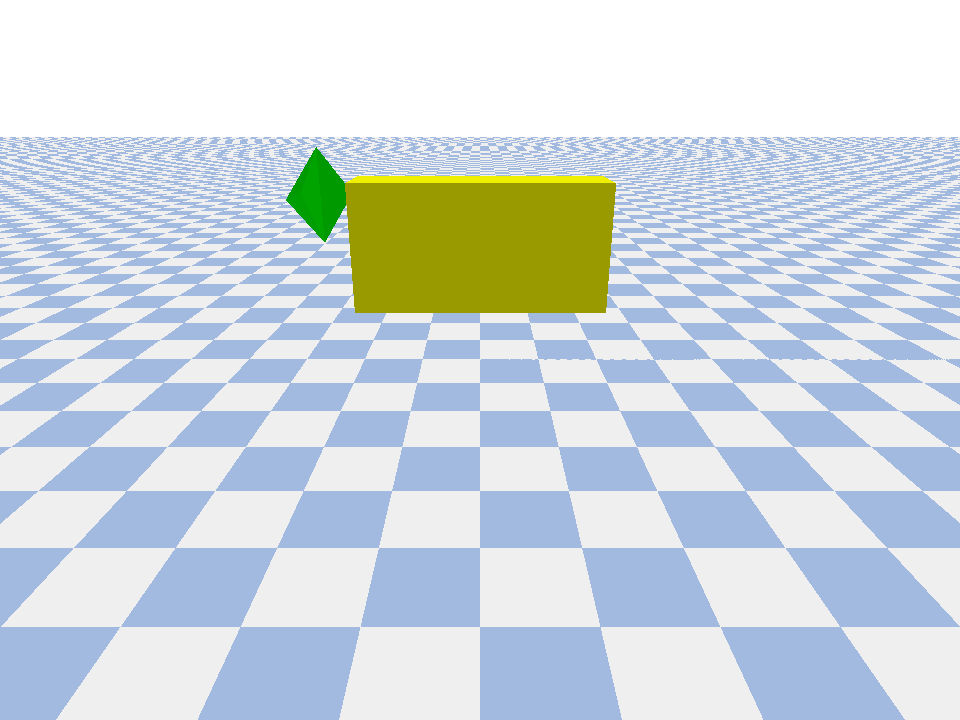

In [8]:
import bayes3d.pybullet_sim as pbs
import numpy as np

# scene of an object partially occluded by a wall 
scene = pbs.Scene() 

path_to_obj = "../assets/sample_objs/diamond.obj" 
position = np.array([-4,6,2])
diamond = pbs.make_body_from_obj(path_to_obj, position, id="diamond")
diamond.set_color(np.array([0,1,0]))
diamond.set_scale(np.array([3,3,3]))
scene.add_body(diamond)

wall = pbs.create_box([0,0,2], [4,1,2], id = "wall")
wall.set_color(np.array([1,1,0]))
scene.add_body(wall)

scene.set_camera_position_target([0,-10,4], [0,0,0])

rgb, depth, segm = scene.render(pbs.pybullet_render)
rgb

### Gif of object moving behind occluder 

In [2]:
import bayes3d.pybullet_sim as pbs
import numpy as np

# scene of an object partially occluded by a wall 
scene = pbs.Scene() 

path_to_obj = "../assets/sample_objs/diamond.obj" 
position = np.array([-4,6,2])
diamond = pbs.make_body_from_obj(path_to_obj, position, id="diamond")
diamond.set_color(np.array([0,1,0]))
diamond.set_scale(np.array([3,3,3]))
diamond.set_velocity([5,0,0])
scene.add_body(diamond)

wall = pbs.create_box([0,0,2], [4,1,2], id = "wall")
wall.set_color(np.array([1,1,0]))
scene.add_body(wall)

scene.set_camera_position_target([0,-10,4], [0,0,0])

scene.set_downsampling(3)
pyb = scene.simulate(120)
pyb.create_seg_gif("segmentaion_animation.gif")
pyb.create_gif("segmentation_animation_baseline.gif")

### Simulatneous Occluder/Non-Occluder Segmentation 

In [ ]:
import bayes3d.pybullet_sim as pbs
import numpy as np

# scene of an object partially occluded by a wall 
scene = pbs.Scene() 

path_to_obj = "../assets/sample_objs/diamond.obj" 
position = np.array([-4,6,2])
diamond = pbs.make_body_from_obj(path_to_obj, position, id="diamond")
diamond.set_color(np.array([0,1,0]))
diamond.set_scale(np.array([3,3,3]))
diamond.set_velocity([5,0,0])
scene.add_body(diamond)

wall = pbs.create_box([0,0,2], [4,1,2], id = "wall")
wall.set_color(np.array([1,1,0]))
wall.set_occluder(True)
scene.add_body(wall)

scene.set_camera_position_target([0,-10,4], [0,0,0])

scene.downsampling(3)
pyb = scene.simulate(120, occlusion = True)
pyb.make_seg_gif("segmentaion_animation.gif")
pyb.make_gif("segmentation_animation_baseline.gif")